In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('./data/raw/train.csv')
train_data['source'] = 'raw'
train_data

,id,url_legal,license,excerpt,target,standard_error,source
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,raw
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,raw
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,raw
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,raw
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,raw
...,...,...,...,...,...,...,...
2829,25ca8f498,https://sites.ehe.osu.edu/beyondpenguins/files...,CC BY-SA 3.0,When you think of dinosaurs and where they liv...,1.711390,0.646900,raw
2830,2c26db523,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,So what is a solid? Solids are usually hard be...,0.189476,0.535648,raw
2831,cd19e2350,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,The second state of matter we will discuss is ...,0.255209,0.483866,raw
2832,15e2e9e7a,https://en.wikibooks.org/wiki/Geometry_for_Ele...,CC BY-SA 3.0,Solids are shapes that you can actually touch....,-0.215279,0.514128,raw


# EDA

<AxesSubplot:>

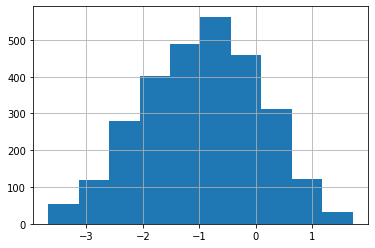

In [3]:
train_data['target'].hist()

<AxesSubplot:>

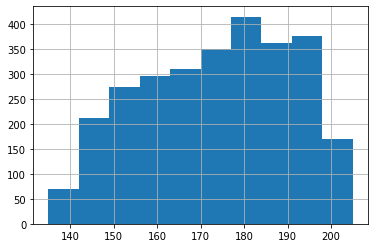

In [4]:
# just get a sense of token cnt. not accurate
train_data['token_cnt'] = train_data['excerpt'].apply(lambda x: len(x.replace('\n', ' ').split()))
train_data['token_cnt'].hist()

# Readability Score

<AxesSubplot:>

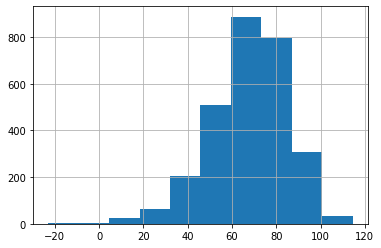

In [5]:
import textstat
train_data['fre_score'] = train_data['excerpt'].apply(lambda x: textstat.flesch_reading_ease((x)))
train_data['fre_score'].hist()

<AxesSubplot:>

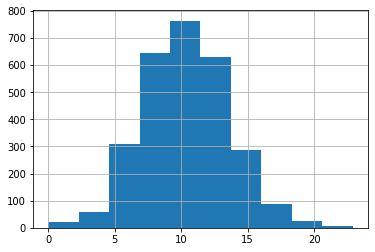

In [6]:
train_data['smog_score'] = train_data['excerpt'].apply(lambda x: textstat.smog_index((x)))
train_data['smog_score'].hist()

<AxesSubplot:>

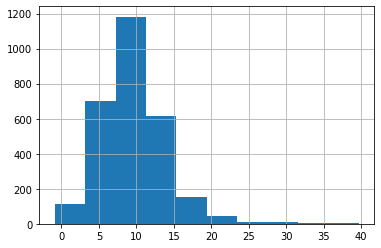

In [7]:
train_data['fkg_score'] = train_data['excerpt'].apply(lambda x: textstat.flesch_kincaid_grade((x)))
train_data['fkg_score'].hist()

<AxesSubplot:>

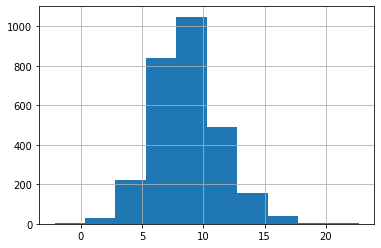

In [8]:
train_data['cli_score'] = train_data['excerpt'].apply(lambda x: textstat.coleman_liau_index((x)))
train_data['cli_score'].hist()

<AxesSubplot:>

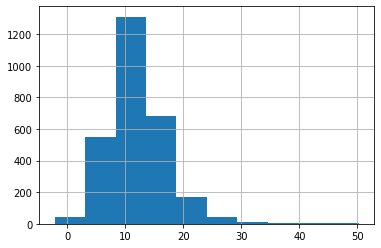

In [9]:
train_data['ari_score'] = train_data['excerpt'].apply(lambda x: textstat.automated_readability_index((x)))
train_data['ari_score'].hist()

<AxesSubplot:>

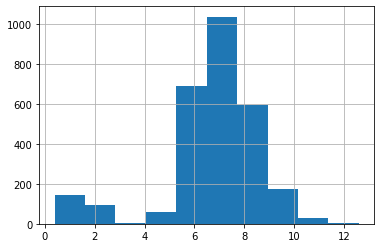

In [10]:
train_data['dcr_score'] = train_data['excerpt'].apply(lambda x: textstat.dale_chall_readability_score((x)))
train_data['dcr_score'].hist()

<AxesSubplot:>

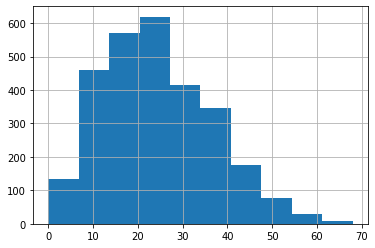

In [11]:
train_data['dw_score'] = train_data['excerpt'].apply(lambda x: textstat.difficult_words((x)))
train_data['dw_score'].hist()

<AxesSubplot:>

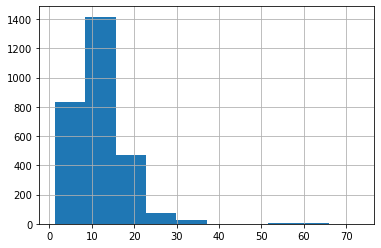

In [12]:
train_data['lwf_score'] = train_data['excerpt'].apply(lambda x: textstat.linsear_write_formula((x)))
train_data['lwf_score'].hist()

<AxesSubplot:>

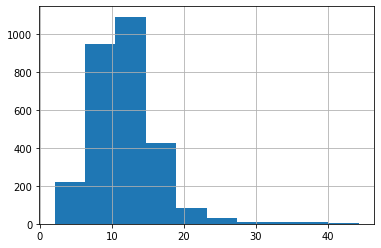

In [13]:
train_data['gf_score'] = train_data['excerpt'].apply(lambda x: textstat.gunning_fog((x)))
train_data['gf_score'].hist()

<AxesSubplot:>

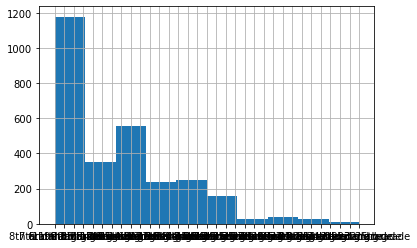

In [14]:
train_data['ts_score'] = train_data['excerpt'].apply(lambda x: textstat.text_standard((x)))
train_data['ts_score'].hist()

<AxesSubplot:>

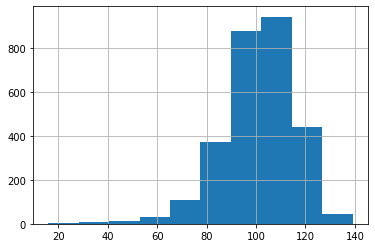

In [15]:
train_data['fh_score'] = train_data['excerpt'].apply(lambda x: textstat.fernandez_huerta((x)))
train_data['fh_score'].hist()

<AxesSubplot:>

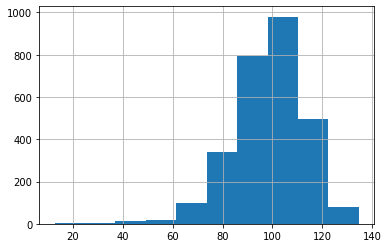

In [16]:
train_data['sp_score'] = train_data['excerpt'].apply(lambda x: textstat.szigriszt_pazos((x)))
train_data['sp_score'].hist()

<AxesSubplot:>

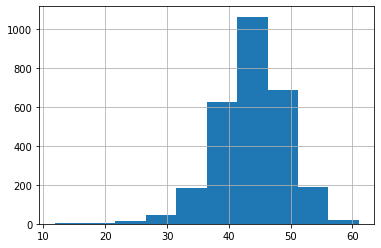

In [17]:
train_data['gp_score'] = train_data['excerpt'].apply(lambda x: textstat.gutierrez_polini((x)))
train_data['gp_score'].hist()

<AxesSubplot:>

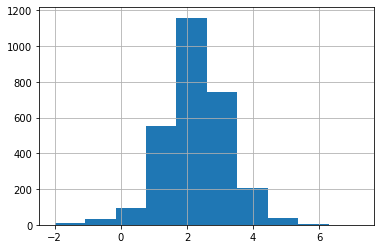

In [18]:
train_data['cf_score'] = train_data['excerpt'].apply(lambda x: textstat.crawford((x)))
train_data['cf_score'].hist()

the following 4 methods follow normal distribution
- smog_index
- gp_score
- cf_score
- cli_score

In [19]:
train_data[['target', 'fre_score', 'smog_score', 'gp_score', 'cf_score', 'cli_score']].sample(40)

,target,fre_score,smog_score,gp_score,cf_score,cli_score
1041,-0.123531,58.72,13.9,37.58,3.0,12.82
2433,-0.516232,69.15,11.2,41.72,2.3,9.29
450,-0.133798,74.90,8.8,44.99,1.9,9.09
789,-0.618987,57.61,12.8,37.61,2.9,12.53
636,0.390334,61.46,11.9,42.10,2.6,10.68
691,-0.416671,64.61,11.2,41.37,2.5,11.19
2004,1.124295,90.53,6.0,47.55,1.3,6.74
958,-1.040647,65.62,10.6,44.09,2.2,9.74
661,1.367284,78.48,9.4,47.17,1.8,7.36
1981,0.381140,78.08,8.1,49.40,1.6,6.21


# Data Augmentation

In [20]:
from sklearn.model_selection import train_test_split
sub_data = train_data.sample(20)
sub_train_data, sub_test_data = train_test_split(sub_data, test_size=0.2)
print(len(sub_train_data), len(sub_test_data))

16 4


In [27]:
import json

config = {
    'augs': [
        ('back_translation', None), 
        ('context_word_embs', 'bert-base-cased'),
        ('context_word_embs', 'xlnet-base-cased')
    ],
    'device': 'cuda',
    'batch_size': 500,
    'validation_methods': ['fre', 'smog', 'gp', 'cf', 'cli'],
    'change_threshold': 0.1,
    'min_voter': 4
}

with open("augmentation_config.json", "w") as outfile: 
    json.dump(config, outfile, indent=4)

In [23]:
from augmentation import Augmentor
augmentor = Augmentor('augmentation_config.json')

Using cache found in /home/edward/.cache/torch/hub/pytorch_fairseq_master
Using cache found in /home/edward/.cache/torch/hub/pytorch_fairseq_master


In [24]:
aug_data = augmentor.generate(sub_train_data)
aug_data

/mnt/c/edward/coding/kaggle/common-lit-kaggle/augmentation.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fre_score'] = data['excerpt'].apply(lambda x: textstat.flesch_reading_ease((x)))
/mnt/c/edward/coding/kaggle/common-lit-kaggle/augmentation.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smog_score'] = data['excerpt'].apply(lambda x: textstat.smog_index((x)))
/mnt/c/edward/coding/kaggle/common-lit-kaggle/augmentation.py:60: SettingWithCopyWarning: 
A value is trying to be set on 

,id,url_legal,license,excerpt,target,standard_error
0,a62b7b3b4,,,"""Now is the time to pick the cherries!"" Charle...",0.405275,-1
1,c85db4cc7,,,Another striking difference between monkeys an...,0.004187,-1
2,54163d93f,,,"One evening, as I lay flat on the deck of my s...",-0.728202,-1
3,69c52df11,,,One method of realizing virtual reality is sim...,-1.357038,-1
4,f73f7365c,,,So if we were to portray our Earth as a small ...,-1.942804,-1
5,a9829cf3d,,,"In modern politics, a state is an association ...",-0.881081,-1
7,9d2d55759,,,The British Parliament passed these laws to pu...,-0.483763,-1
8,6d7c845a3,,,The normal and characteristic occupations of t...,-3.320429,-1
9,e4b2adc8c,,,"When Edward was eight years old, his mother to...",1.124295,-1
11,2b2fdfc8c,,,The boiling point of a substance is the temper...,-1.589572,-1
